### Preparando o ambiente

In [1]:
# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# direciona para o caminho desejado
%cd /content/drive/MyDrive/PRETALAB/Análise \de \Dados/Aula02

/content/drive/MyDrive/PRETALAB/Análise de Dados/Aula02


In [3]:
#Este módulo fornece uma maneira simples de usar funcionalidades que são dependentes de sistema operacional
import os

# os.getcwd() retorna o caminho absoluto do diretório de trabalho atual
print(os.getcwd())

/content/drive/MyDrive/PRETALAB/Análise de Dados/Aula02


In [4]:
# Mostra o conteudo do local/pasta
!ls

'Aula2 - Análise de Dados.ipynb'


# Passo a Passo da Análise de Dados Completa



Para esta análise completa, vamos usar a base de dados "Heart Disease UCI" do Kaggle, que contém dados relacionados a fatores de risco e ocorrências de doenças cardíacas. O objetivo é demonstrar como realizar uma análise de dados desde a extração, limpeza, tratamento e análise estatística, incluindo testes de hipótese.

Link para o dataset: [Heart Disease UCI Dataset](https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci)

## 1. Extração dos Dados

Vamos começar baixando a base de dados do Kaggle e carregando os dados em um DataFrame do pandas.

### Importando bibliotecas

In [5]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Extraindo os dados

In [6]:
# Download latest version
path = kagglehub.dataset_download("ketangangal/heart-disease-dataset-uci")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ketangangal/heart-disease-dataset-uci/versions/1


In [7]:
# Carregando a base de clientes
dados = pd.read_csv('/root/.cache/kagglehub/datasets/ketangangal/heart-disease-dataset-uci/versions/1/HeartDiseaseTrain-Test.csv')

In [8]:
# Visualizar os primeiros registros
dados.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


## 2. Limpeza e Tratamento dos Dados

In [9]:
# Verificar se há valores ausentes
print(dados.isnull().sum())

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


In [10]:
# Verificar valores duplicados
print(f"Valores duplicados: {dados.duplicated().sum()}")

Valores duplicados: 723


In [11]:
# Remover valores duplicados, se existirem
dados.drop_duplicates(inplace=True)

In [12]:
# Resumo estatístico dos dados
dados.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.543046
std,9.04797,17.563394,51.753489,22.903527,1.161452,0.498970
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,1.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,1.000000


## 3. Entendimento das Variáveis


Vamos examinar algumas variáveis importantes e entender como elas se relacionam com a ocorrência de doenças cardíacas (variável target).

In [13]:
# Resumo estatístico dos dados
round(dados.describe(), 2)

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,302.00,302.00,302.00,302.00,302.00,302.00
mean,54.42,131.60,246.50,149.57,1.04,0.54
std,9.05,17.56,51.75,22.90,1.16,0.50
min,29.00,94.00,126.00,71.00,0.00,0.00
25%,48.00,120.00,211.00,133.25,0.00,0.00
50%,55.50,130.00,240.50,152.50,0.80,1.00
75%,61.00,140.00,274.75,166.00,1.60,1.00
max,77.00,200.00,564.00,202.00,6.20,1.00


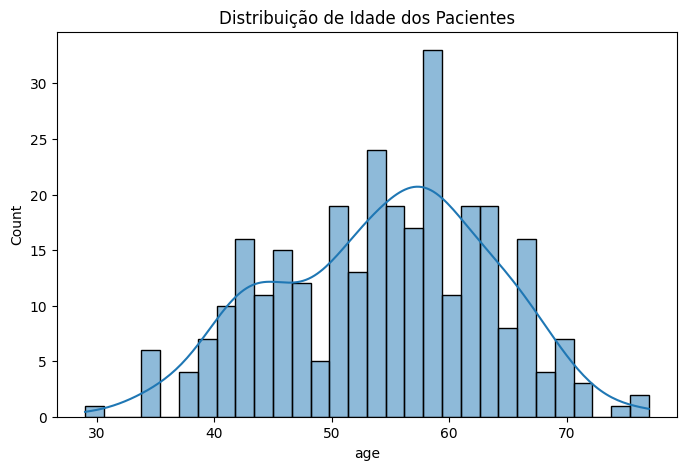

In [14]:
# Plotar a distribuição de idade dos pacientes
plt.figure(figsize=(8,5))
sns.histplot(dados['age'], kde=True, bins=30)
plt.title('Distribuição de Idade dos Pacientes')
plt.show()

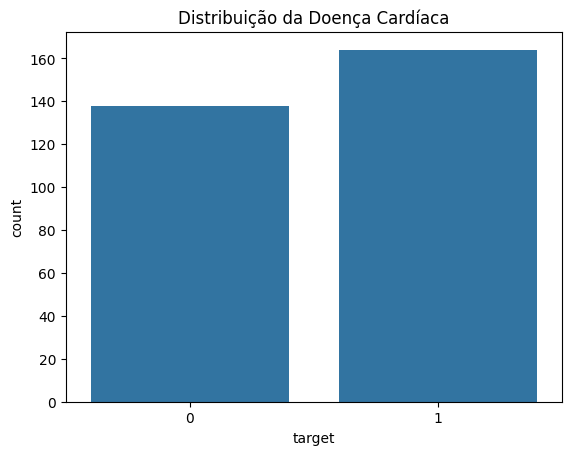

In [15]:
# Análise da variável alvo (target)
sns.countplot(x='target', data=dados)
plt.title('Distribuição da Doença Cardíaca')
plt.show()

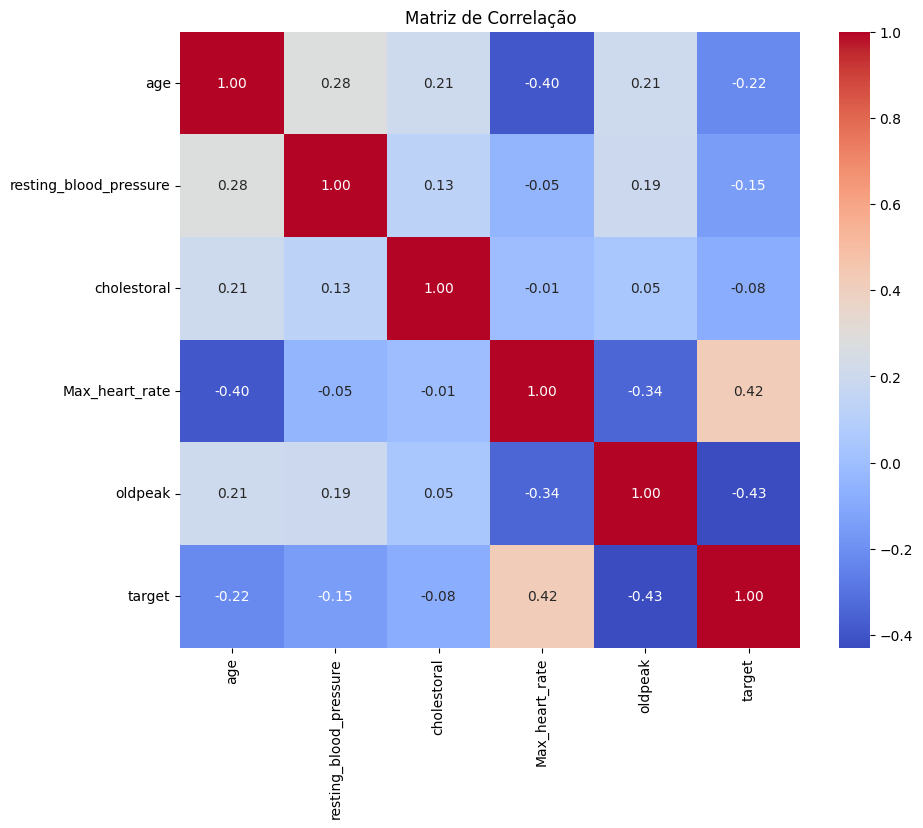

In [16]:
# Matriz de correlação
plt.figure(figsize=(10,8))
# Select only numeric columns for correlation calculation
numeric_data = dados.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            302 non-null    int64  
 1   sex                            302 non-null    object 
 2   chest_pain_type                302 non-null    object 
 3   resting_blood_pressure         302 non-null    int64  
 4   cholestoral                    302 non-null    int64  
 5   fasting_blood_sugar            302 non-null    object 
 6   rest_ecg                       302 non-null    object 
 7   Max_heart_rate                 302 non-null    int64  
 8   exercise_induced_angina        302 non-null    object 
 9   oldpeak                        302 non-null    float64
 10  slope                          302 non-null    object 
 11  vessels_colored_by_flourosopy  302 non-null    object 
 12  thalassemia                    302 non-null    object 


In [18]:
dados['slope'].unique()

array(['Downsloping', 'Upsloping', 'Flat'], dtype=object)

## 4. Pré-processamento dos Dados

Aqui vamos realizar uma transformação em algumas variáveis que precisam ser ajustadas para a análise. Além disso, vamos normalizar colunas que possuem valores em diferentes escalas.

In [19]:
# Normalizar as colunas com diferentes escalas (como idade e colesterol)
from sklearn.preprocessing import StandardScaler

Criar uma copia do dataset para normalizar os dados e criar os testes estatísticos

In [20]:
# Fazendo uma cópia do meu dataset
dados2 = dados.copy()

In [21]:
# Verificar estatísticas dos dados da coluna colesterol
dados['cholestoral'].describe()

,cholestoral
count,302.000000
mean,246.500000
std,51.753489
min,126.000000
25%,211.000000
50%,240.500000
75%,274.750000
max,564.000000


Na coluna colesterol por exemplo o std esta muito alto, indicando que existem numeros muito alto (que podem ou não ser outlier) necessitando normalizar essa variável, pois dados muito fora da media pode influenciar o resultado da minhas análises estatísticas.

In [22]:
# Normalizar colunas que estão em diferentes escalas
scaler = StandardScaler()

dados2[['age', 'cholestoral', 'resting_blood_pressure', 'Max_heart_rate']] = scaler.fit_transform(dados2[['age', 'cholestoral', 'resting_blood_pressure', 'Max_heart_rate']])

In [23]:
# Verificar os dados após a normalização
dados2.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,-0.267966,Male,Typical angina,-0.376556,-0.667728,Lower than 120 mg/ml,ST-T wave abnormality,0.806035,No,1.0,Downsloping,Two,Reversable Defect,0
1,-0.157260,Male,Typical angina,0.478910,-0.841918,Greater than 120 mg/ml,Normal,0.237495,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,1.724733,Male,Typical angina,0.764066,-1.403197,Lower than 120 mg/ml,ST-T wave abnormality,-1.074521,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,0.728383,Male,Typical angina,0.935159,-0.841918,Lower than 120 mg/ml,ST-T wave abnormality,0.499898,No,0.0,Downsloping,One,Reversable Defect,0
4,0.839089,Female,Typical angina,0.364848,0.919336,Greater than 120 mg/ml,ST-T wave abnormality,-1.905464,No,1.9,Flat,Three,Fixed Defect,0


In [24]:
dados2.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,3.020000e+02,3.020000e+02,3.020000e+02,3.020000e+02,302.000000,302.000000
mean,-2.676299e-16,-6.676043e-16,-1.470494e-17,-5.323189e-16,1.043046,0.543046
std,1.001660e+00,1.001660e+00,1.001660e+00,1.001660e+00,1.161452,0.498970
min,-2.814192e+00,-2.144521e+00,-2.332210e+00,-3.436149e+00,0.000000,0.000000
25%,-7.107878e-01,-6.617119e-01,-6.870826e-01,-7.137164e-01,0.000000,0.000000
50%,1.195033e-01,-9.140084e-02,-1.161266e-01,1.281605e-01,0.800000,1.000000
75%,7.283833e-01,4.789102e-01,5.467629e-01,7.185677e-01,1.600000,1.000000
max,2.499671e+00,3.900776e+00,6.145034e+00,2.292987e+00,6.200000,1.000000


## Passo 5: Análise Estatística: Teste de Hipóteses e Probabilidade

In [25]:
from scipy import stats


Teste de Hipótese 1: Frequência Cardíaca Máxima (Max_heart_rate)





In [26]:
# Separar os grupos
thalach_com_doenca = dados2[dados2['target'] == 1]['Max_heart_rate']
thalach_sem_doenca = dados2[dados2['target'] == 0]['Max_heart_rate']

In [27]:
# Teste T de duas amostras
t_stat, p_value = stats.ttest_ind(thalach_com_doenca, thalach_sem_doenca)

In [28]:
# Visualizar resultado do teste T
print(f"Estatística T: {t_stat}")

Estatística T: 8.01484825214011


In [29]:
# Visualizar resultado do p-valor
print(f"Valor-p: {p_value}")

Valor-p: 2.476146047923499e-14


In [30]:
# Interpretação
if p_value < 0.05:
    print("Rejeitamos a hipótese nula: Há uma diferença significativa na frequência cardíaca máxima.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferença significativa na frequência cardíaca máxima.")

Rejeitamos a hipótese nula: Há uma diferença significativa na frequência cardíaca máxima.


Teste de Hipótese 2: Níveis de Colesterol (chol)


In [31]:
# Separar os grupos
chol_com_doenca = dados2[dados2['target'] == 1]['cholestoral']
chol_sem_doenca = dados2[dados2['target'] == 0]['cholestoral']

In [32]:
# Teste T de duas amostras
t_stat, p_value = stats.ttest_ind(chol_com_doenca, chol_sem_doenca)

In [33]:
# Visualizar resultado do teste T
print(f"Estatística T: {t_stat}")

Estatística T: -1.4152344258787541


In [34]:
# Visualizar resultado do p-valor
print(f"Valor-p: {p_value}")

Valor-p: 0.15803697464249777


In [35]:
# Interpretação
if p_value < 0.05:
    print("Rejeitamos a hipótese nula: Há uma diferença significativa nos níveis de colesterol.")
else:
    print("Não rejeitamos a hipótese nula: Não há diferença significativa nos níveis de colesterol.")

Não rejeitamos a hipótese nula: Não há diferença significativa nos níveis de colesterol.


## Passo 6: Probabilidade e Distribuições

Voltamos a usar os dados não normalizados!

In [36]:
# Probabilidade de doença cardíaca em pacientes acima de 50 anos
idade_acima_50 = dados[dados['age'] > 50]
prob_doenca_acima_50 = idade_acima_50['target'].mean()

print(f"Probabilidade de ter doença cardíaca em pacientes acima de 50 anos: {prob_doenca_acima_50:.2%}")

Probabilidade de ter doença cardíaca em pacientes acima de 50 anos: 47.60%


## Passo 7: Conclusão e Storytelling

***Introdução ao Contexto:***

Nosso objetivo é entender os fatores que influenciam o diagnóstico de doenças cardíacas, identificando quais variáveis são mais indicativas de risco e quais podem ser usadas para prever essa condição.

Para isso, analisamos dados de pacientes com diversas informações clínicas e comportamentais, como idade, níveis de colesterol, frequência cardíaca máxima, entre outros.

***1. Teste de Hipóteses: Avaliação dos Fatores Clínicos***

Através dos testes de hipóteses, pudemos investigar a relevância de diferentes variáveis no diagnóstico de doenças cardíacas. Vamos apresentar os principais achados:

  - Frequência Cardíaca Máxima: Um Indicador Importante A análise mostrou que existe uma diferença estatisticamente significativa na frequência cardíaca máxima alcançada entre pacientes com e sem doença cardíaca. Isso sugere que a frequência cardíaca máxima é um fator relevante na identificação de risco cardíaco.
  
  Para ilustrar, vamos observar o gráfico abaixo:

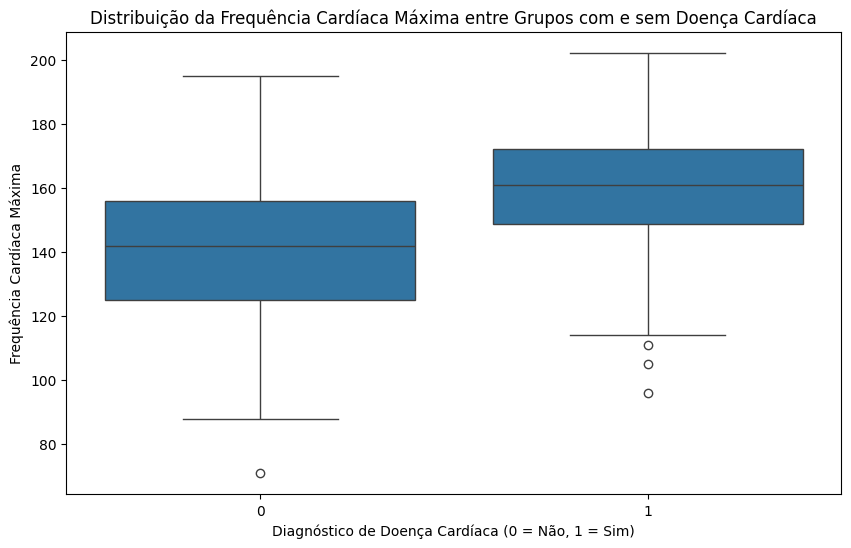

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='Max_heart_rate', data=dados)
plt.title('Distribuição da Frequência Cardíaca Máxima entre Grupos com e sem Doença Cardíaca')
plt.xlabel('Diagnóstico de Doença Cardíaca (0 = Não, 1 = Sim)')
plt.ylabel('Frequência Cardíaca Máxima')
plt.show()

O gráfico de boxplot acima revela que os pacientes com diagnóstico positivo para doença cardíaca tendem a ter uma frequência cardíaca máxima mais baixa em comparação com aqueles sem a condição. Isso sugere que a limitação na capacidade de aumentar a frequência cardíaca durante o esforço pode ser um indicador de doença cardíaca.

***2. Análise de Probabilidade: Idade como Fator Crítico***

A análise probabilística indica que a idade desempenha um papel crucial no risco de desenvolver doenças cardíacas. Pacientes acima de 50 anos apresentam uma probabilidade consideravelmente maior de diagnóstico positivo para a condição. A idade surge, então, como um fator determinante, o que reforça a importância de iniciativas preventivas voltadas para essa faixa etária.

  - Gráfico de Distribuição por Faixa Etária Para visualizarmos melhor essa correlação, a distribuição de pacientes com doença cardíaca por faixa etária é apresentada a seguir:



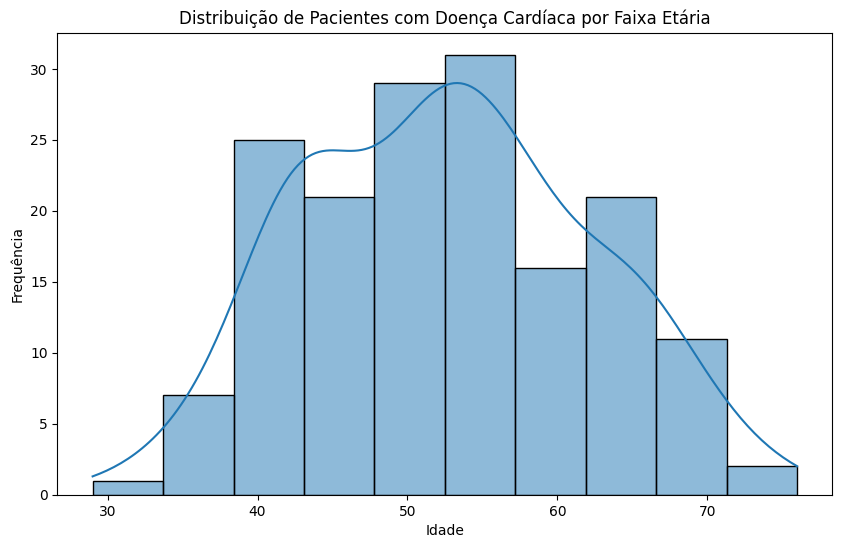

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dados[dados['target'] == 1], x='age', bins=10, kde=True)
plt.title('Distribuição de Pacientes com Doença Cardíaca por Faixa Etária')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

O gráfico de distribuição mostra uma concentração mais alta de casos de doença cardíaca em pacientes com mais de 50 anos, enfatizando que a idade é um fator de risco importante.

### Storytelling: De Dados a Decisões

***1. Cenário Atual:***

As doenças cardíacas são uma das principais causas de mortalidade, e entender os fatores de risco pode ajudar a salvar vidas. Nossa análise focou em variáveis como idade, colesterol e frequência cardíaca para identificar padrões e fatores preditivos.

***2. Exploração dos Dados:***

Analisamos os dados de pacientes com e sem diagnóstico de doença cardíaca para identificar quais variáveis se mostravam mais relevantes. Nossos testes de hipóteses foram aplicados para validar essas variáveis estatisticamente.

***3. Principais Descobertas:***

 - A frequência cardíaca máxima mostrou-se significativamente diferente entre os grupos, sugerindo que limitações na capacidade de aumentar a frequência cardíaca podem indicar maior risco cardíaco.

 - Os níveis de colesterol, embora considerados comumente um fator de risco, não apresentaram diferença significativa entre os grupos analisados.

- Pacientes acima de 50 anos apresentam uma maior probabilidade de desenvolver a condição, destacando a idade como um fator importante.

***4.Implicações para o Futuro:***

 - Programas de rastreamento mais rigorosos para pessoas acima de 50 anos podem ajudar a detectar a doença mais cedo.

- Monitoramento contínuo da frequência cardíaca máxima durante avaliações de saúde pode ser utilizado como parte de um protocolo preventivo.

- A inclusão de outros fatores e comportamentos no modelo de análise pode melhorar ainda mais a precisão do diagnóstico.

***5. Próximos Passos:***

Com base nos resultados, recomendamos ajustes nas políticas de saúde e prevenção, além de maior ênfase no monitoramento dos fatores críticos identificados, visando à redução do risco de doenças cardíacas na população.